In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Converting file formate

In [2]:
import os

path = "../Dataset"

for name in os.listdir(path):
    
    if name.endswith(".txt") == False:
        if name.endswith(".csv") == False:
            if name.endswith(".data") == True:
                ext = ".csv"
            else:
                ext = ".txt"
            file_path = os.path.join(path, name)
            os.rename(file_path, file_path + ext)

# For eight hours

In [3]:
file = open("..\Dataset\eighthr.names.txt")
txt = file.read()
col = []
for i in txt.split("\n\n")[-1].split("\n"):
    col.append(i.split(":")[0])
col = col[:-1]
col.append("Ozone")

ozone8 = pd.read_csv("..\Dataset\eighthr.data.csv", header = None).to_numpy()
ozone8 = pd.DataFrame(ozone8, columns = col)
ozone8.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Ozone
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0


In [4]:
print("Shape:" + str(ozone8.shape))

Shape:(2534, 74)


In [5]:
ozone8 = ozone8.replace("?", None).fillna(method = "backfill")
ozone8["month"], ozone8["day"], ozone8["year"] = zip(* ozone8["Date"].str.split("/"))
ozone8.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,HT50,KI,TT,SLP,SLP_,Precp,Ozone,month,day,year
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,5795,-12.1,17.9,10330,-55,0,0.0,1,1,1998
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,5805,14.05,29,10275,-55,0,0.0,1,2,1998
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,5790,17.9,41.3,10235,-40,0,0.0,1,3,1998
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,5775,31.15,51.7,10195,-40,2.08,0.0,1,4,1998
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,5770,27.95,46.25,10120,-80,0.58,0.0,1,5,1998


In [6]:
ozone8.describe()

,Ozone
count,2534.000000
mean,0.063141
std,0.243265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
ozone8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 77 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2534 non-null   object 
 1   WSR0    2534 non-null   object 
 2   WSR1    2534 non-null   object 
 3   WSR2    2534 non-null   object 
 4   WSR3    2534 non-null   object 
 5   WSR4    2534 non-null   object 
 6   WSR5    2534 non-null   object 
 7   WSR6    2534 non-null   object 
 8   WSR7    2534 non-null   object 
 9   WSR8    2534 non-null   object 
 10  WSR9    2534 non-null   object 
 11  WSR10   2534 non-null   object 
 12  WSR11   2534 non-null   object 
 13  WSR12   2534 non-null   object 
 14  WSR13   2534 non-null   object 
 15  WSR14   2534 non-null   object 
 16  WSR15   2534 non-null   object 
 17  WSR16   2534 non-null   object 
 18  WSR17   2534 non-null   object 
 19  WSR18   2534 non-null   object 
 20  WSR19   2534 non-null   object 
 21  WSR20   2534 non-null   object 
 22  

Text(0.5, 0.98, 'Day Classification')

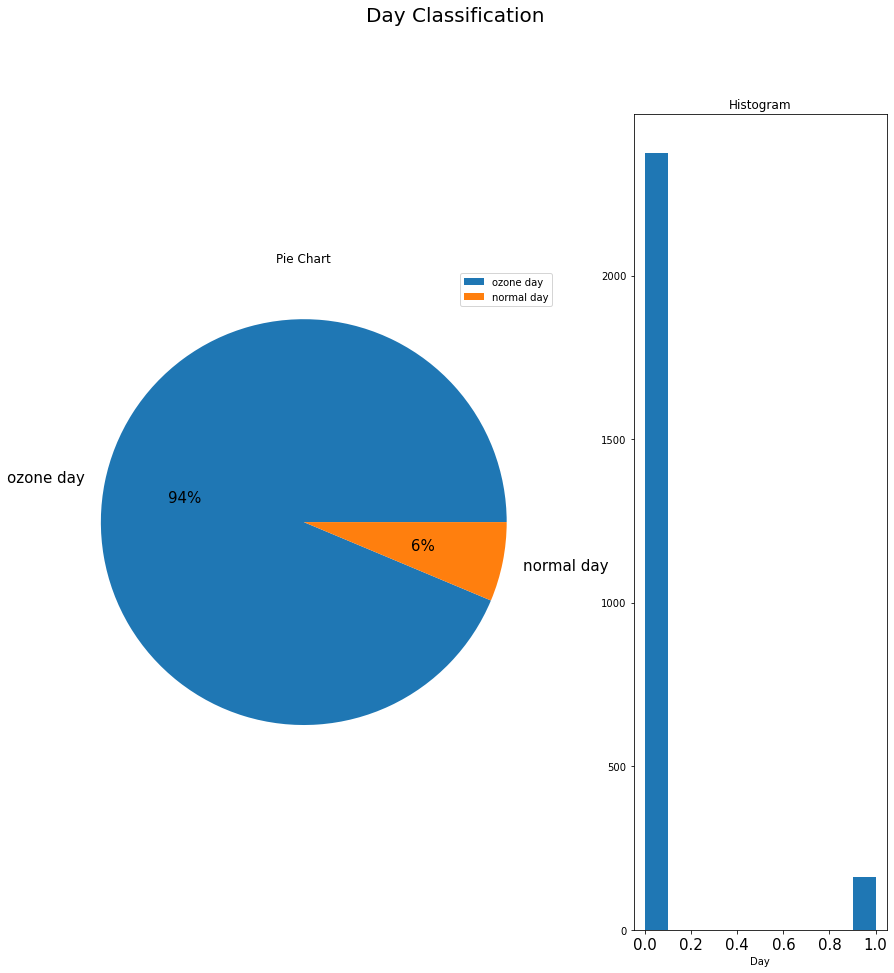

In [8]:
fig = plt.figure(figsize=(15, 15))

grid = plt.GridSpec(1, 2, width_ratios=[2, 1])  

ax1 = plt.subplot(grid[0, 0]) 
ax1.pie(ozone8["Ozone"].value_counts(), labels = ["ozone day", "normal day"], autopct='%.0f%%', textprops={'fontsize': 15})
ax1.set_title('Pie Chart')
ax1.legend()

ax2 = plt.subplot(grid[0, 1])  
ax2.hist(ozone8["Ozone"])
plt.xticks(fontsize = 15)
ax2.set_title('Histogram')
ax2.set_xlabel("Day")

plt.suptitle("Day Classification", fontsize = 20)

In [9]:
x = ozone8.drop(['Ozone', "Date"], axis=1)
y = ozone8['Ozone']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = model.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 93.68836291913215


# For one hours

In [12]:
file = open("..\Dataset\onehr.names.txt")
txt = file.read()
col = []
for i in txt.split("\n\n")[-1].split("\n"):
    col.append(i.split(":")[0])
col = col[:-1]
col.append("Ozone")

ozone1 = pd.read_csv("..\Dataset\onehr.data.csv", header = None).to_numpy()
ozone1 = pd.DataFrame(ozone1, columns = col)
ozone1.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Ozone
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0


In [13]:
print("Shape:" + str(ozone1.shape))

Shape:(2536, 74)


In [14]:
ozone1 = ozone1.replace("?", None).fillna(method = "backfill")
ozone1["month"], ozone1["day"], ozone1["year"] = zip(* ozone1["Date"].str.split("/"))
ozone1.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,HT50,KI,TT,SLP,SLP_,Precp,Ozone,month,day,year
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,5795,-12.1,17.9,10330,-55,0,0.0,1,1,1998
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,5805,14.05,29,10275,-55,0,0.0,1,2,1998
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,5790,17.9,41.3,10235,-40,0,0.0,1,3,1998
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,5775,31.15,51.7,10195,-40,2.08,0.0,1,4,1998
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,5770,27.95,46.25,10120,-80,0.58,0.0,1,5,1998


In [15]:
ozone1.describe()

,Ozone
count,2536.000000
mean,0.028785
std,0.167236
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
ozone1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 77 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2536 non-null   object 
 1   WSR0    2536 non-null   object 
 2   WSR1    2536 non-null   object 
 3   WSR2    2536 non-null   object 
 4   WSR3    2536 non-null   object 
 5   WSR4    2536 non-null   object 
 6   WSR5    2536 non-null   object 
 7   WSR6    2536 non-null   object 
 8   WSR7    2536 non-null   object 
 9   WSR8    2536 non-null   object 
 10  WSR9    2536 non-null   object 
 11  WSR10   2536 non-null   object 
 12  WSR11   2536 non-null   object 
 13  WSR12   2536 non-null   object 
 14  WSR13   2536 non-null   object 
 15  WSR14   2536 non-null   object 
 16  WSR15   2536 non-null   object 
 17  WSR16   2536 non-null   object 
 18  WSR17   2536 non-null   object 
 19  WSR18   2536 non-null   object 
 20  WSR19   2536 non-null   object 
 21  WSR20   2536 non-null   object 
 22  

Text(0.5, 0.98, 'Day Classification')

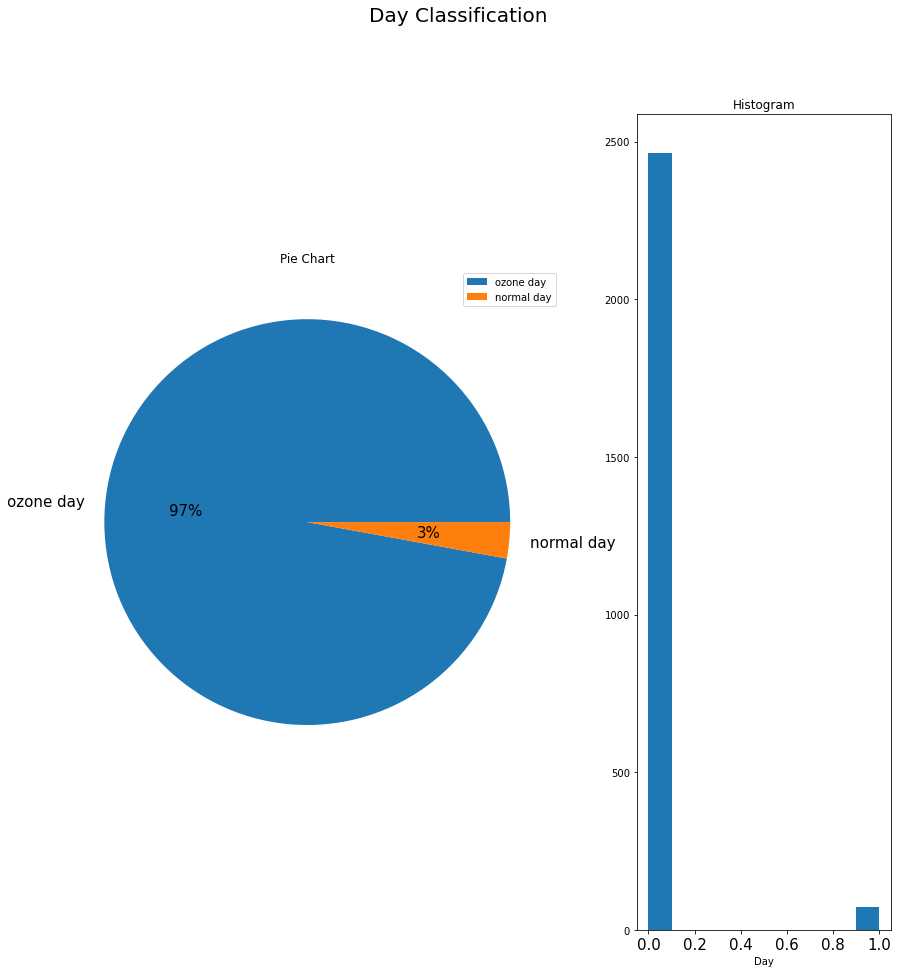

In [17]:
fig = plt.figure(figsize=(15, 15))

grid = plt.GridSpec(1, 2, width_ratios=[2, 1])  

ax1 = plt.subplot(grid[0, 0]) 
ax1.pie(ozone1["Ozone"].value_counts(), labels = ["ozone day", "normal day"], autopct='%.0f%%', textprops={'fontsize': 15})
ax1.set_title('Pie Chart')
ax1.legend()

ax2 = plt.subplot(grid[0, 1])  
ax2.hist(ozone1["Ozone"])
plt.xticks(fontsize = 15)
ax2.set_title('Histogram')
ax2.set_xlabel("Day")

plt.suptitle("Day Classification", fontsize = 20)

In [18]:
x = ozone1.drop(['Ozone', "Date"], axis=1)
y = ozone1['Ozone']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = model.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 98.22834645669292
